In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylot as plt
from datetime import datetime
%matplotlib inline

D:\Software\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ModuleNotFoundError: No module named 'matplotlib.pylot'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
columns = ['user_id', 'order_dt', 'quantity', 'total']
data = pd.read_table('CDNOW.txt', names=columns, sep='\s+')

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [4]:
data.head()

,user_id,order_dt,quantity,total
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id     69659 non-null int64
order_dt    69659 non-null int64
quantity    69659 non-null int64
total       69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
data['order_date']=pd.to_datetime(data.order_dt,format='%Y%m%d')
data['month'] = data['order_date'].astype('datetime64[M]')

In [7]:
data.head()

,user_id,order_dt,quantity,total,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [8]:
data.describe()

,user_id,order_dt,quantity,total
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [9]:
data.groupby('month')[total].sum()

NameError: name 'total' is not defined

In [10]:
data.groupby('month')['total'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: total, dtype: float64

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [12]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'sum_day')

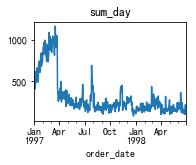

In [13]:
plt.subplot(221)
data.groupby('order_date')['quantity'].sum().plot()
plt.title("sum_day")

Text(0.5, 1.0, 'sum_month')

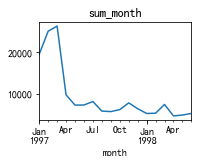

In [14]:
plt.subplot(222)
data.groupby('month')['quantity'].sum().plot()
plt.title("sum_month")

Text(0.5, 1.0, 'total_day')

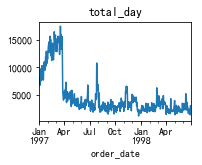

In [15]:
plt.subplot(223)
data.groupby('order_date')['total'].sum().plot()
plt.title("total_day")

Text(0.5, 1.0, 'total_day')

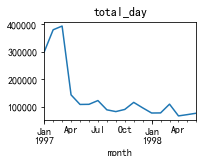

In [16]:
plt.subplot(224)
data.groupby('month')['total'].sum().plot()
plt.title("total_day")

In [17]:
plt.tight_layout() # 设置子图的间距
plt.show()

<Figure size 432x288 with 0 Axes>

In [18]:
plt

<module 'matplotlib.pyplot' from 'D:\\Software\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [19]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

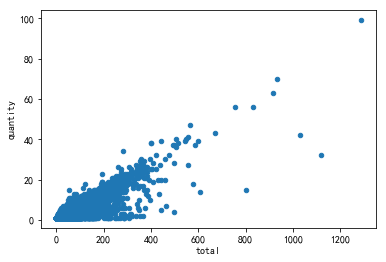

In [20]:
data.plot.scatter(x='total', y='quantity')

In [21]:
data.groupby('user_id').sum().describe()

,order_dt,quantity,total
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


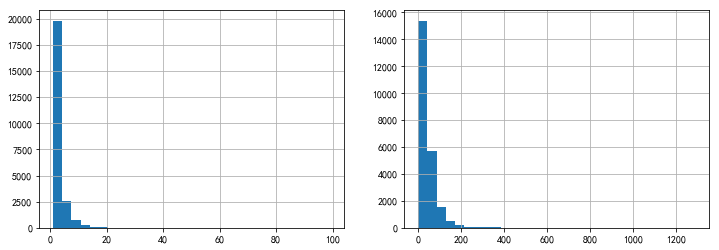

In [22]:
plt.figure(figsize=(12,4))
#各用户最大单笔购买数量
plt.subplot(121)
data.groupby('user_id')['quantity'].max().hist(bins=30)
#各用户最大单笔购买金额
plt.subplot(122)
data.groupby('user_id')['total'].max().hist(bins=30)

In [23]:
data.groupby('user_id')['month'].min().value_counts()/data['user_id'].nunique()

1997-02-01    0.359610
1997-01-01    0.332881
1997-03-01    0.307510
Name: month, dtype: float64

In [24]:
data.groupby('user_id')['month'].max().value_counts()/data['user_id'].nunique()

1997-02-01    0.208401
1997-03-01    0.189987
1997-01-01    0.177853
1998-06-01    0.063895
1998-05-01    0.044209
1998-03-01    0.042130
1998-04-01    0.032626
1997-04-01    0.028723
1997-12-01    0.026305
1997-11-01    0.025838
1998-02-01    0.023335
1998-01-01    0.021807
1997-06-01    0.021171
1997-07-01    0.020916
1997-05-01    0.020365
1997-10-01    0.019304
1997-09-01    0.016843
1997-08-01    0.016292
Name: month, dtype: float64